In [34]:
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt

capital = 10000000

plt.style.use('bmh')

In [20]:
file = open(os.path.join("data", "FXMM.pickle"), 'rb')
data = signals = pickle.load(file)

bars_dict = data['bars']
bars =  []
for instrument in list(bars_dict.keys()):
    tmp_bar = bars_dict[instrument][['Close']]
    tmp_bar.columns = [instrument]
    bars.append(tmp_bar)
bars = pd.concat(bars, axis=1)
positions = data['positions']['positions']

In [45]:
weights = positions.iloc[-1]
risk_matrix = []
for wname in weights.index:
    risk_matrix.append(weights[wname] * bars.diff()[[wname]])
risk_matrix_df = pd.concat(risk_matrix, axis=1) * capital

<AxesSubplot:>

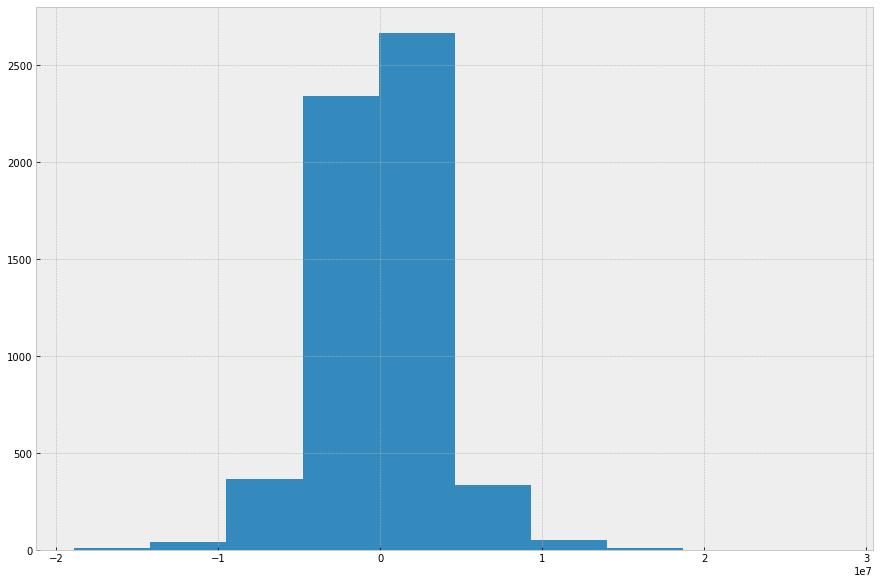

In [46]:
risk_matrix_df.sum(axis=1).hist(figsize=(15, 10))

In [47]:
risk_matrix_df.sum(axis=1).quantile(0.01)

-9243950.0